In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from random import randint

from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("train.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown,0
1,55244,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0
2,70992,Female,8.0,0,0,No,children,Urban,74.42,22.5,Unknown,0
3,38207,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked,0
4,8541,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4083,22352,Female,39.0,0,0,Yes,Self-employed,Urban,87.79,40.0,formerly smoked,0
4084,2885,Male,72.0,1,0,Yes,Private,Rural,231.71,NaN,Unknown,0
4085,52808,Male,73.0,0,0,Yes,Private,Urban,84.11,27.9,never smoked,0
4086,71222,Male,75.0,1,0,Yes,Private,Urban,234.51,27.2,formerly smoked,0


In [ ]:
# check duplicate values
data.duplicated().sum()

0

In [ ]:
# drop duplicates
data = data.drop_duplicates()

In [ ]:
data.shape

(4088, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 4087
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3924 non-null   float64
 10  smoking_status     4088 non-null   object 
 11  stroke             4088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 415.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3924.000000,4088.000000
mean,36672.108855,43.464932,0.099804,0.054795,106.434481,28.943527,0.050391
std,21175.554576,22.560096,0.299776,0.227607,45.395197,7.814239,0.218778
min,67.000000,0.080000,0.000000,0.000000,55.230000,10.300000,0.000000
25%,18065.250000,26.000000,0.000000,0.000000,77.342500,23.600000,0.000000
50%,36990.000000,45.000000,0.000000,0.000000,92.210000,28.100000,0.000000
75%,54815.250000,61.000000,0.000000,0.000000,114.320000,33.200000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  164
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
object = (data.dtypes == 'object')
object_category = list(object[object].index)
object_category

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
# Handle missing values if any (simple strategy: fill with median for numerical, most common for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical
        data[column] = data[column].fillna(data[column].median())

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
#check again missing null, still in the data or not
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

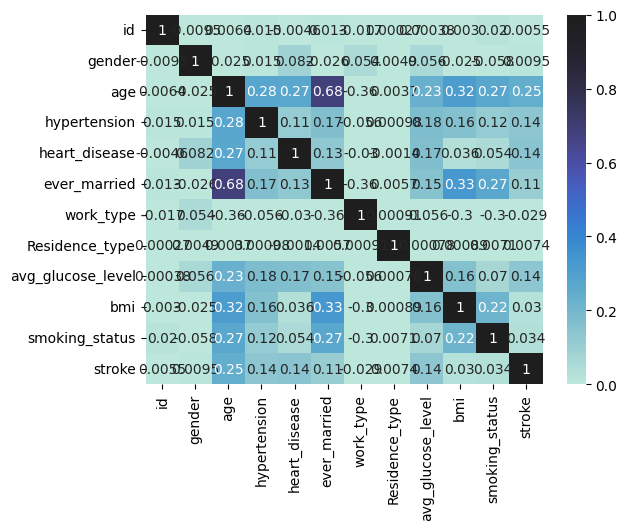

In [ ]:
sns.heatmap(data.corr(),annot=True,vmin=0, vmax=1, center=True)

In [ ]:
data['age_cat'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, float('inf')],labels=['<=20', '20-30', '30-40','40-50','50-60', '>=60'])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,40041,1,31.0,0,0,0,3,0,64.85,23.0,0,0,30-40
1,55244,1,40.0,0,0,1,3,0,65.29,28.3,2,0,30-40
2,70992,0,8.0,0,0,0,4,1,74.42,22.5,0,0,<=20
3,38207,0,79.0,1,0,1,3,0,76.64,19.5,2,0,>=60
4,8541,0,75.0,0,0,1,0,0,94.77,27.2,2,0,>=60


In [ ]:
data.groupby('ever_married').mean()

<ipython-input-16-8ddc413330a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('ever_married').mean()


,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
ever_married,,,,,,,,,,,
0,36301.322744,0.429603,21.937646,0.028881,0.014440,2.711191,0.494585,96.613047,25.349892,0.965343,0.017329
1,36862.097299,0.402516,54.495376,0.136145,0.075472,1.888642,0.500555,111.466922,30.733703,1.578246,0.067333


In [ ]:
data.ever_married = [1 if each == 'Yes' else 0 for each in data.ever_married]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,40041,1,31.0,0,0,0,3,0,64.85,23.0,0,0,30-40
1,55244,1,40.0,0,0,0,3,0,65.29,28.3,2,0,30-40
2,70992,0,8.0,0,0,0,4,1,74.42,22.5,0,0,<=20
3,38207,0,79.0,1,0,0,3,0,76.64,19.5,2,0,>=60
4,8541,0,75.0,0,0,0,0,0,94.77,27.2,2,0,>=60


In [ ]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

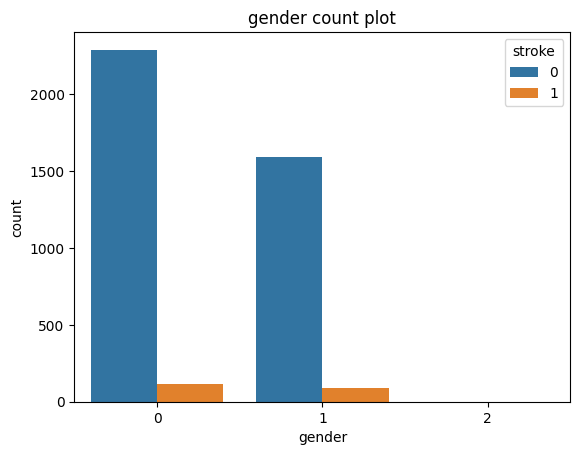

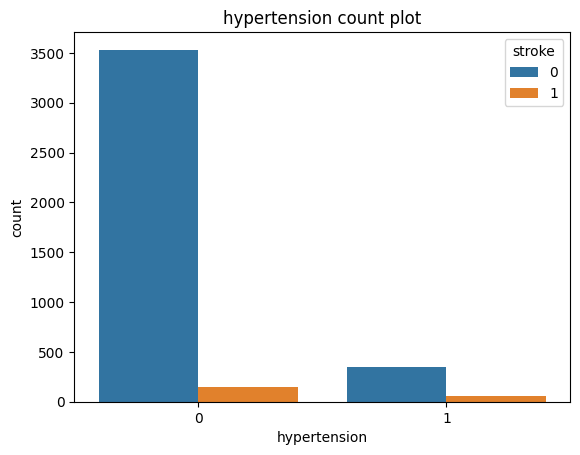

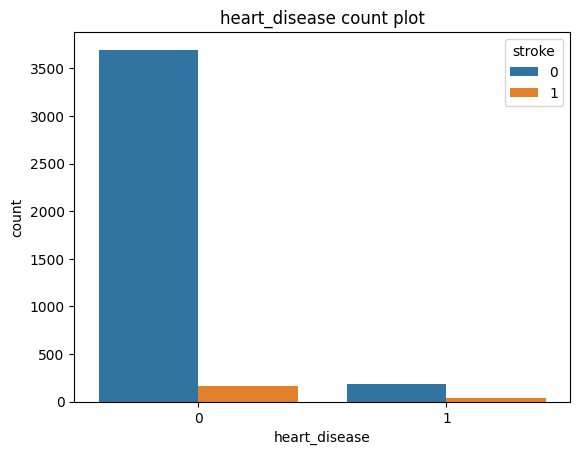

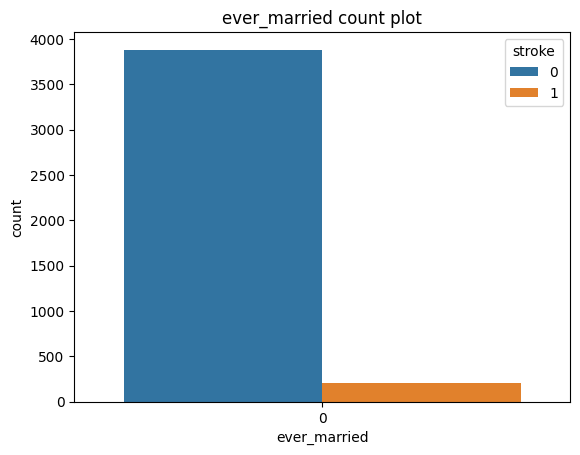

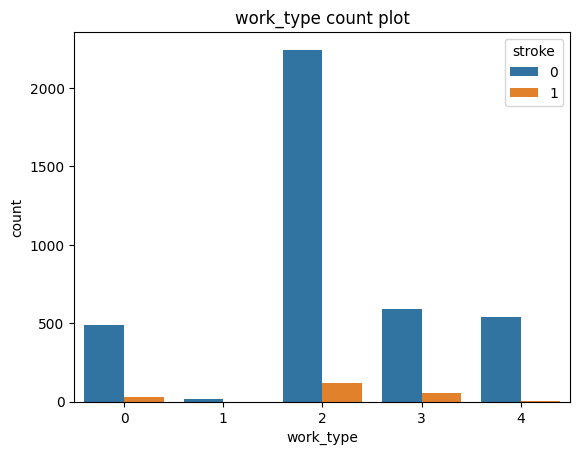

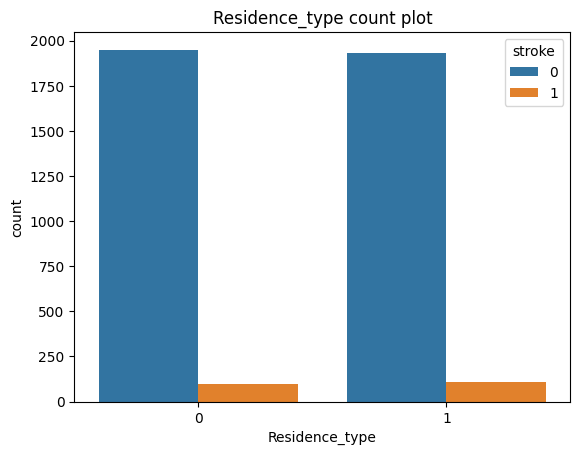

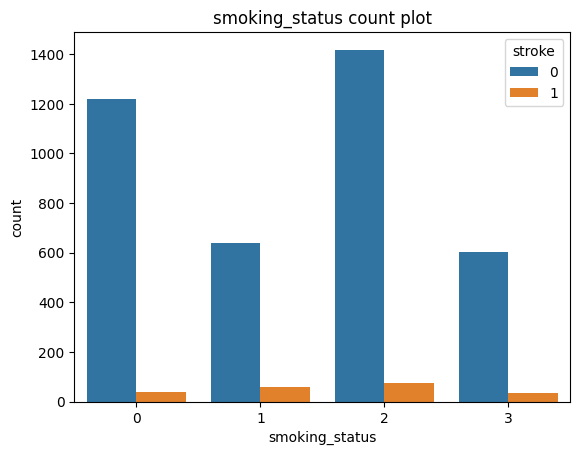

In [ ]:
for feature in categorical_features:
    sns.countplot(data=data, x=feature, hue='stroke')
    plt.title(feature+' count plot')
    plt.show()

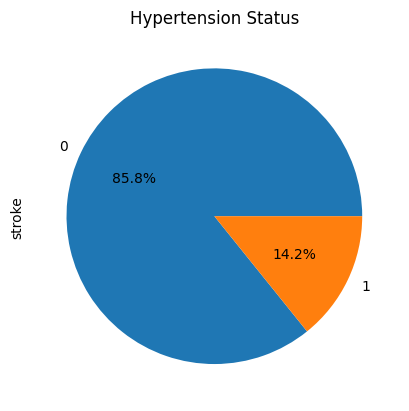

In [ ]:
data[data.hypertension == 1].stroke.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Hypertension Status')
plt.show()

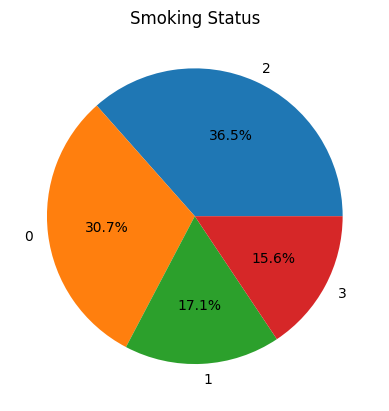

In [ ]:
%matplotlib inline
data_smoked = data['smoking_status'].value_counts().reset_index()

plt.pie(data_smoked['smoking_status'], labels=data_smoked['index'], autopct='%1.1f%%')
plt.title('Smoking Status')


plt.show()

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

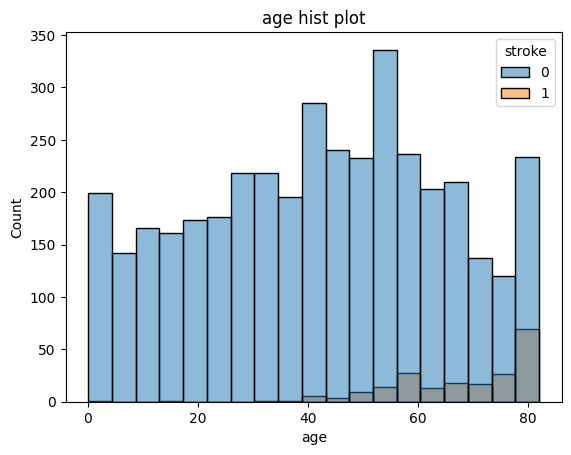

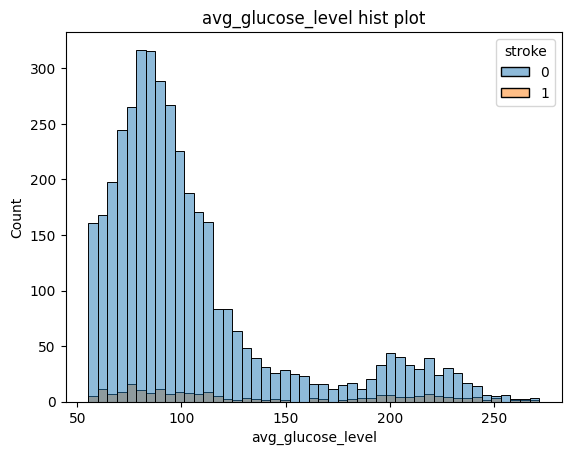

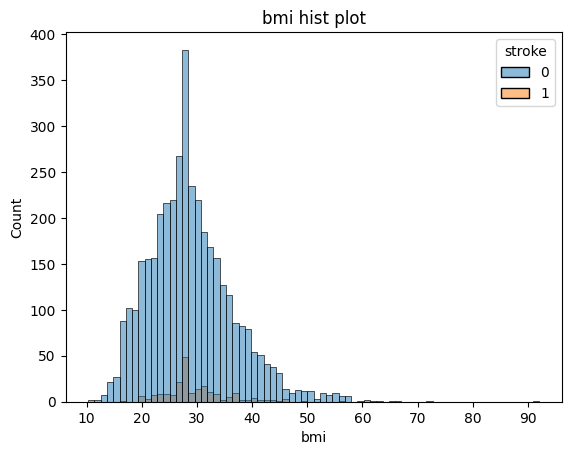

In [ ]:
for feature in numerical_features:
    sns.histplot(data=data, x=feature, hue='stroke')
    plt.title(feature+' hist plot')
    plt.show()

# Preprocessing


In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.0,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,0.411693,43.464932,0.099804,0.054795,0.0,2.167319,0.498532,106.434481,28.909687,1.370597,0.050391
std,0.492697,22.560096,0.299776,0.227607,0.0,1.082091,0.500059,45.395197,7.657641,1.077558,0.218778
min,0.000000,0.080000,0.000000,0.000000,0.0,0.000000,0.000000,55.230000,10.300000,0.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.0,2.000000,0.000000,77.342500,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,0.0,2.000000,0.000000,92.210000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,0.0,3.000000,1.000000,114.320000,32.900000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,0.0,4.000000,1.000000,271.740000,92.000000,3.000000,1.000000


In [ ]:
data[['age','avg_glucose_level','bmi']].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.233101,0.319607
avg_glucose_level,0.233101,1.000000,0.160949
bmi,0.319607,0.160949,1.000000


In [ ]:
stroke_majority=data[data['stroke']==0]
stroke_minority=data[data['stroke']==1]

In [ ]:
X = data.drop('stroke', axis=1).values
y = data['stroke'].values

# Random Forest

In [ ]:
# Decision Tree Node
class DecisionNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

# Tree building functions
def entropy(y):
    class_labels = np.unique(y)
    entropy = 0
    for cls in class_labels:
        p_cls = len(y[y == cls]) / len(y)
        entropy -= p_cls * np.log2(p_cls)
    return entropy

def split_data(X, y, feature_index, threshold):
    left_indices = np.argwhere(X[:, feature_index] <= threshold).flatten()
    right_indices = np.argwhere(X[:, feature_index] > threshold).flatten()
    return (X[left_indices], y[left_indices]), (X[right_indices], y[right_indices])

def calculate_info_gain(parent, l_child, r_child):
    weight_l = len(l_child[1]) / len(parent[1])
    weight_r = len(r_child[1]) / len(parent[1])
    gain = entropy(parent[1]) - (weight_l * entropy(l_child[1]) + weight_r * entropy(r_child[1]))
    return gain

def best_split(X, y, features_indices):
    best_split = {}
    max_info_gain = -float("inf")

    # loop over all the features
    for feature_index in features_indices:
        feature_values = X[:, feature_index]
        possible_thresholds = np.unique(feature_values)
        # loop over all the feature values present in the data
        for threshold in possible_thresholds:
            # get current split
            (X_left, y_left), (X_right, y_right) = split_data(X, y, feature_index, threshold)
            # check if childs are not null
            if len(X_left) > 0 and len(X_right) > 0:
                current_info_gain = calculate_info_gain((X, y), (X_left, y_left), (X_right, y_right))
                if current_info_gain > max_info_gain:
                    best_split["feature_index"] = feature_index
                    best_split["threshold"] = threshold
                    best_split["left"] = (X_left, y_left)
                    best_split["right"] = (X_right, y_right)
                    best_split["info_gain"] = current_info_gain
                    max_info_gain = current_info_gain

    return best_split

def build_tree(X, y, min_samples_split, max_depth, current_depth=0, features_indices=None):
    num_samples, num_features = np.shape(X)
    # init best split
    best_split_result = {}
    # if dataset is pure
    if len(np.unique(y)) == 1:
        leaf_value = np.unique(y)[0]
        return DecisionNode(value=leaf_value)

    # check if subsample size is reached
    if num_samples >= min_samples_split and current_depth <= max_depth:
        if not features_indices:
            features_indices = range(num_features)

        best_split_result = best_split(X, y, features_indices)
        # check if information gain is positive
        if best_split_result:
            left_subtree = build_tree(best_split_result["left"][0], best_split_result["left"][1], min_samples_split, max_depth, current_depth + 1, features_indices)
            right_subtree = build_tree(best_split_result["right"][0], best_split_result["right"][1], min_samples_split, max_depth, current_depth + 1, features_indices)
            return DecisionNode(best_split_result["feature_index"], best_split_result["threshold"], left_subtree, right_subtree, best_split_result["info_gain"])

    # compute leaf node
    leaf_value = max(y, key=list(y).count)
    return DecisionNode(value=leaf_value)


# Decision Tree Classifier
class DecisionTreeClassifier:
    def __init__(self, min_samples_split=5, max_depth=10):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = build_tree(X, y, self.min_samples_split, self.max_depth)

    def predict(self, X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        if tree.value != None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

# Random Forest Classifier
class RandomForestClassifier:
    def __init__(self, n_trees=100, min_samples_split=5, max_depth=10, n_features=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(self.min_samples_split, self.max_depth)
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_predictions = np.swapaxes(tree_predictions, 0, 1)
        y_pred = [self.most_common_label(tree_prediction) for tree_prediction in tree_predictions]
        return np.array(y_pred)

    def most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


In [ ]:
# Split the data
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [ ]:
# Train the model
clf = RandomForestClassifier(n_trees=10, max_depth=10)
clf.fit(X_rf_train, y_rf_train)

In [ ]:
# Make predictions
y_rf_pred = clf.predict(X_rf_test)

# Evaluate the model
accuracy = np.mean(y_rf_pred == y_rf_test)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9364303178484108


# Optimation Using GA

In [ ]:
def initialization_of_population(size, n_feat):
    population = np.random.randint(0, 2, (size, n_feat))  # Randomly initialize population
    return population

In [ ]:
def generations(df, label, size, n_feat, crossover_rate, mutation_rate, n_gen, X_rf_train, X_rf_test, y_rf_train, y_rf_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_rf_train, X_rf_test, y_rf_train, y_rf_test)
        print('Best score in generation', i + 1, ':', scores[:1])
        pop_after_sel = selection(size, pop_after_fit, crossover_rate)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score


def fitness_score(population, X_rf_train, X_rf_test, y_rf_train, y_rf_test):
    scores = []
    for chromosome in population:
        selected_features = np.where(chromosome)[0]
        X_rf_train_selected = X_rf_train[:, selected_features]
        X_rf_test_selected = X_rf_test[:, selected_features]
        clf.fit(X_rf_train_selected, y_rf_train)
        predictions = clf.predict(X_rf_test_selected)
        scores.append(accuracy_score(y_rf_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(size, pop_after_fit, crossover_rate):
    population_nextgen = []
    parent = int(crossover_rate * size)
    for i in range(parent):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2], child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for chromo in pop_after_cross:
        mutated_chromo = chromo.copy()
        for _ in range(mutation_range):
            pos = randint(0, n_feat - 1)
            mutated_chromo[pos] ^= 1
        pop_next_gen.append(mutated_chromo)
    return pop_next_gen


In [ ]:
chromo_df_bc, score_bc = generations(X, y, size=200, n_feat=X.shape[1], crossover_rate=0.2, mutation_rate=0.1, n_gen=4, X_rf_train=X_rf_train, X_rf_test=X_rf_test, y_rf_train=y_rf_train, y_rf_test=y_rf_test)

Best score in generation 1 : [0.9372453137734311]
Best score in generation 2 : [0.9380603096984516]
Best score in generation 3 : [0.9380603096984516]
Best score in generation 4 : [0.9396903015484923]


In [ ]:
import pickle

random_forest_model = clf
label_encoders = label_encoders
std_scalers = std_scalers

models_dict = {
    "rf": random_forest_model,
    "label_encoders": label_encoders,
    "std_scalers": std_scalers,
    "genetic_algorithm_chromosome": chromo_df_bc,
    "genetic_algorithm_score": score_bc
}

with open("models.pkl", "wb") as f:
    pickle.dump(models_dict, f)

print("Models saved successfully to models.pkl")
